<a href="https://colab.research.google.com/github/Bruce-159/-Pattern-recognition-HW/blob/main/HW05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 13s 31ms/step - loss: 0.6130 - accuracy: 0.8162 - val_loss: 0.2645 - val_accuracy: 0.9195
Epoch 2/2
375/375 [==============================] - 7s 19ms/step - loss: 0.2486 - accuracy: 0.9220 - val_loss: 0.1774 - val_accuracy: 0.9477
Epoch 1/2
375/375 [==============================] - 8s 20ms/step - loss: 0.2853 - accuracy: 0.9175 - val_loss: 0.1443 - val_accuracy: 0.9579
Epoch 2/2
375/375 [==============================] - 7s 19ms/step - loss: 0.1189 - accuracy: 0.9645 - val_loss: 0.1074 - val_accuracy: 0.9682


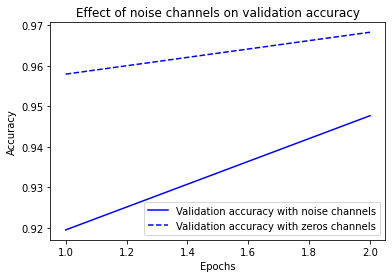

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1,3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 2.3162 - accuracy: 0.1015 - val_loss: 2.3067 - val_accuracy: 0.1047
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 2.3002 - accuracy: 0.1180 - val_loss: 2.3132 - val_accuracy: 0.1077


In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 1017.9267 - accuracy: 0.3754 - val_loss: 2.4301 - val_accuracy: 0.3128
Epoch 2/2
375/375 [==============================] - 5s 12ms/step - loss: 4.2263 - accuracy: 0.2825 - val_loss: 2.7285 - val_accuracy: 0.2651


In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 0.3714 - accuracy: 0.9101 - val_loss: 0.1559 - val_accuracy: 0.9583
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 0.1440 - accuracy: 0.9628 - val_loss: 0.1618 - val_accuracy: 0.9661


In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 3ms/step - loss: 0.6663 - accuracy: 0.8390 - val_loss: 0.3573 - val_accuracy: 0.9061
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.9040 - val_loss: 0.3088 - val_accuracy: 0.9148


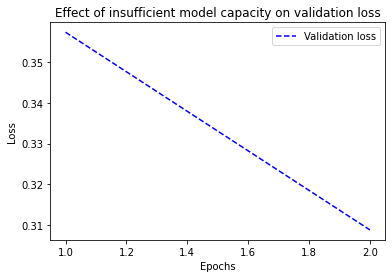

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1,3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 6ms/step - loss: 0.3750 - accuracy: 0.8924 - val_loss: 0.1963 - val_accuracy: 0.9434
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1650 - accuracy: 0.9512 - val_loss: 0.1466 - val_accuracy: 0.9553


In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/2
30/30 [==============================] - 2s 48ms/step - loss: 0.5215 - accuracy: 0.7862 - val_loss: 0.3956 - val_accuracy: 0.8664
Epoch 2/2
30/30 [==============================] - 1s 34ms/step - loss: 0.3169 - accuracy: 0.8969 - val_loss: 0.3053 - val_accuracy: 0.8900


In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 40ms/step - loss: 0.6348 - accuracy: 0.6282 - val_loss: 0.5811 - val_accuracy: 0.7065
Epoch 2/2
30/30 [==============================] - 1s 31ms/step - loss: 0.5402 - accuracy: 0.7818 - val_loss: 0.5296 - val_accuracy: 0.7838


In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 10s 303ms/step - loss: 0.5437 - accuracy: 0.7548 - val_loss: 0.2994 - val_accuracy: 0.8795
Epoch 2/2
30/30 [==============================] - 10s 331ms/step - loss: 0.2413 - accuracy: 0.9056 - val_loss: 0.3688 - val_accuracy: 0.8474


In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 48ms/step - loss: 0.5972 - accuracy: 0.7957 - val_loss: 0.4759 - val_accuracy: 0.8725
Epoch 2/2
30/30 [==============================] - 1s 34ms/step - loss: 0.4103 - accuracy: 0.8925 - val_loss: 0.3964 - val_accuracy: 0.8846


In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 42ms/step - loss: 0.6428 - accuracy: 0.6247 - val_loss: 0.5698 - val_accuracy: 0.7461
Epoch 2/2
30/30 [==============================] - 1s 34ms/step - loss: 0.5459 - accuracy: 0.7541 - val_loss: 0.4582 - val_accuracy: 0.8635
